# Exercise: Compute minimal & maximal minimal s-t-cuts
<font color='blue'><b>Goal:</b></font>
Revisit cuts and flows.

<font color='blue'><b>Python packages required:</b></font>
`networkx`, `pulp`

## Uniqueness of minimal/maximal minimum $s$-$t$ cuts

<font color="blue"><b>First task:</b></font> Proving uniqueness.

*Proof:* Let $E(A,B)$, for $A,B\subseteq V$, $A\cap B=\emptyset$, denote the directed edges in $G$ that point from a vertex in $A$ to a vertex in $B$. Let $C$ and $D$ be $s$-$t$ cuts. Note that then, $C\cap D$ and $C\cup D$ are $s$-$t$ cuts as well, and

$$
u\big(\delta^+(C)\big)+u\big(\delta^+(D)\big)=u\big(\delta^+(C\cap D)\big)+ u\big(\delta^+(C\cup D)\big)+\underbrace{u\big(E(C\setminus D,D\setminus C)\big)}_{\geq 0}+\underbrace{u\big(E(D\setminus C,C\setminus D)\big)}_{\geq 0}
$$
$$
\ge u\big(\delta^+(C\cap D)\big)+ u\big(\delta^+(C\cup D)\big)\enspace.
$$

If $C$ and $D$ are both minimum $s$-$t$ cuts, then the cut values on the right hand side of the above inequality are at least as large as $u(\delta^+(C))$ and $u(\delta^+(D))$, so we also get the reverse inequality, thus there must be equality throughout, and we get that both $C\cap D$ and $C\cup D$ are minimum $s$-$t$ cuts, as well.

- Let $C$ and $D$ be two inclusion-wise minimal minimum $s$-$t$ cuts of $G$, and assume for the sake of deriving a contradiction that $C\neq D$. By the above, $C\cap D$ is a minimum $s$-$t$ cut, as well. But $C\cap D$ is a strict subset of at least one of $C$ and $D$, contradicting that they are both chosen to be inclusion-wise minimal minimum $s$-$t$ cuts. Thus, $C=D$, proving that there is a unique inclusion-wise minimal minimum $s$-$t$ cut.

- Let $C$ and $D$ be two inclusion-wise maximal minimum $s$-$t$ cuts of $G$, and assume for the sake of deriving a contradiction that $C\neq D$. By the above, $C\cup D$ is a minimum $s$-$t$ cut, as well. But $C\cup D$ is a strict superset of at least one of $C$ and $D$, contradicting that they are both chosen to be inclusion-wise maximal minimum $s$-$t$ cuts. Thus, $C=D$, proving that there is a unique inclusion-wise maximal minimum $s$-$t$ cut.

This finishes the proof.

## A characterization in terms of residual graphs

<font color="blue"><b>Second task:</b></font> Characterizations.

To show the first characterization, let $C\subseteq V$ be the set of vertices reachable from $s$ in $(V,U_f)$. By definition of $C$, all arcs in $\delta^+_{G_f}(C)$ have residual capacity $0$. This implies that in particular, for every edge $a\in\delta_G^+(C)$, the residual capacity on $a$ must be zero, hence $f(a)=u(a)$, and thus $f(\delta^+_G(C))=u(\delta^+_G(C))$. Moreover, for every edge $a\in\delta_G^-(C)$, the flow on $a$ must be zero, i.e., $f(a)=0$, and thus $f(\delta^-_G(C))=0$. Consequently,

$$ \nu(f) = f(\delta^+_G(C)) - f(\delta^-_G(C)) = u(\delta^+_G(C))\enspace, $$

hence by the weak max-flow min-cut theorem, $C$ is a minimum cut. Now assume for contradiction that there is an (inclusion-wise) strictly smaller minimum $s$-$t$ cut $C_0\subsetneq C$. Thus, there exists a vertex $v\in C\setminus C_0$, and by construction of $C$, there is an $s$-$v$ path in $(V,U_f)$. As $C_0$ is a minimum cut, we must have 

$$ \nu(f) =f(\delta^+_G(C_0)) - f(\delta^-_G(C_0)) = u(\delta^+_G(C_0))\enspace, $$

and as $f(a) \leq u(a)$ for all $a\in \delta^+_G(C_0)$, and $f(a)\geq 0$ for all $a\in \delta^-_G(C_0)$, we conclude that all these inequalities must be equalities. But this implies that for any edge $b\in \delta^+_{G_f}(C_0)$, we have $u_f(b)=0$. But this contradicts existence of an $s$-$v$ path in $(V,U_f)$: Because $s\in C_0$ and $v\notin C_0$, such a path would have to use an edge crossing $C_0$ at some point.



The proof of the second characterization on maximal minimum $s$-$t$ cuts is analogous, with the roles of $s$ and $t$ as well as incoming and outgoing edges reversed.

## Finding a minimal/maximal minimum $s$-$t$ cuts

<font color="blue"><b>Third task:</b></font> Examining the toy example gives the following:
- The minimum $s$-$t$ cuts in the toy example graph are $\{s\}$, $\{s, F\}$, $\{s, F, C\}$, and $\{s, F, G, C\}$.
- The cut $\{s\}$, and $\{s, F, G, C\}$ are minimal and maximal, respectively, among the cuts listed above.

<font color="blue"><b>Fourth task:</b></font> Implementation. To get minimal/maximal minimum $s$-$t$ cuts, we note that if we compute a maximal flow $f$ and consider the residual graph $G_f$ with edges of zero residual capacity removed, the minimal minimum $s$-$t$ cut is the set of vertices reachable from $s$ in the latter graph, while the maximal minimum $s$-$t$ cut is the complement of the set of vertices from which $t$ can be reached. This approach is implemented below.

In [1]:
import networkx as nx

def extremal_min_cut(G, s, t, min_or_max):
    # find max flow
    _, f = nx.maximum_flow(G, "s", "t")
    
    # build residual graph R (containing all arcs with residual capacity >0)
    R = nx.DiGraph()
    R.add_nodes_from(G.nodes())
    for (u,v) in G.edges:
        if f[u][v] < G[u][v]["capacity"]:
            R.add_edge(u,v)
        if f[u][v] > 0:
            R.add_edge(v, u)
    
    # find the right vertex sets
    if min_or_max == "min":
        return nx.descendants(R, "s").union("s")
    if min_or_max == "max":
        return R.nodes() - nx.ancestors(R, "t").union("t")    

## Testing

Toy example:

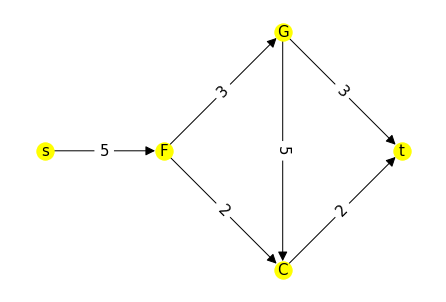

In [2]:
import extremalMinCuts_module as helpers
%matplotlib inline

G0 = helpers.toygraph()
vertex_pos = {"F": (0, .5), "G": (1, 1), "C": (1, 0), "s": (-1, 0.5), "t": (2, .5)}

Minimal minimum s-t cut
{'s'}


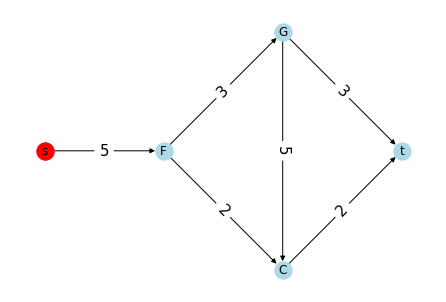

In [9]:
print("Minimal minimum s-t cut")
cut = extremal_min_cut(G0, "s", "t", "min")
print(cut)
helpers.draw_cut(G0, cut, node_pos = vertex_pos)

Maximal minimum s-t cut
{'s', 'C', 'F', 'G'}


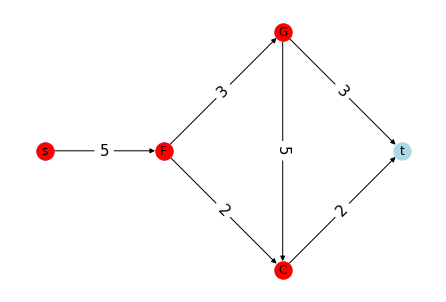

In [4]:
print("Maximal minimum s-t cut")
cut = extremal_min_cut(G0, "s", "t", "max")
print(cut)
helpers.draw_cut(G0, cut, node_pos = vertex_pos)

---

Random graphs: Note that maximal and minimal minimum cuts might often be the same.

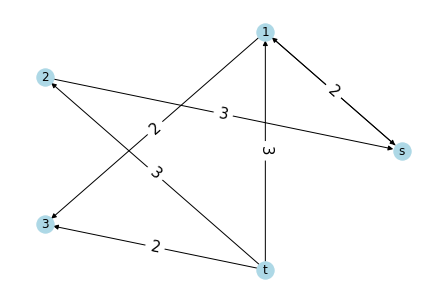

In [5]:
G = helpers.random_graph(5)

Minimal minimum s-t cut
{1, 3, 's'}


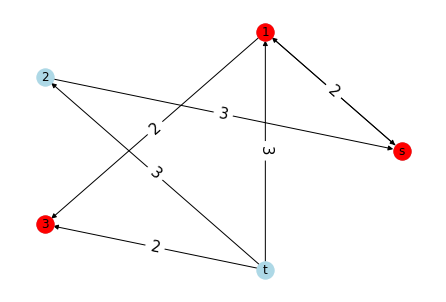

In [6]:
print("Minimal minimum s-t cut")
cut = extremal_min_cut(G, "s", "t", "min")
print(cut)
helpers.draw_cut(G, cut)

Maximal minimum s-t cut
{'s', 2, 3, 1}


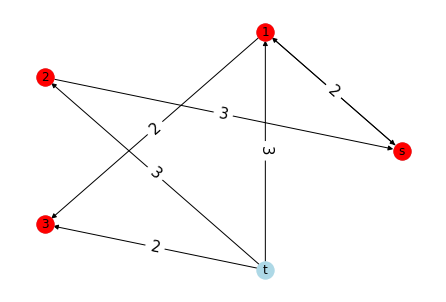

In [7]:
print("Maximal minimum s-t cut")
cut = extremal_min_cut(G, "s", "t", "max")
print(cut)
helpers.draw_cut(G, cut)